# Logistic Regression with Neural Networks

## Import Dependencies

Import libraries.

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import torch.nn.functional as F
import torch.nn as nn
import sklearn
import torch


Loading the iris dataset from sklearn.

In [2]:
iris = load_iris()
X = iris['data']
y = iris['target']


In [3]:
type(iris)

sklearn.utils._bunch.Bunch

In [4]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

Identify the shape of the arrays.

In [5]:
X, y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [6]:
X.shape, y.shape


((150, 4), (150,))

## Data Pre-processing

Using standard scaler to fit and transform the data.

In [7]:
scaler = StandardScaler()
X = scaler.fit_transform(X)


Converting our data into tensors from numpy arrays.

In [8]:
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)


Printing the shape of arrays.

In [9]:
print("Details of X:\nShape: {}\n\nX:\n{}".format(X.shape, X))

Details of X:
Shape: torch.Size([150, 4])

X:
tensor([[-9.0068e-01,  1.0190e+00, -1.3402e+00, -1.3154e+00],
        [-1.1430e+00, -1.3198e-01, -1.3402e+00, -1.3154e+00],
        [-1.3854e+00,  3.2841e-01, -1.3971e+00, -1.3154e+00],
        [-1.5065e+00,  9.8217e-02, -1.2834e+00, -1.3154e+00],
        [-1.0218e+00,  1.2492e+00, -1.3402e+00, -1.3154e+00],
        [-5.3718e-01,  1.9398e+00, -1.1697e+00, -1.0522e+00],
        [-1.5065e+00,  7.8881e-01, -1.3402e+00, -1.1838e+00],
        [-1.0218e+00,  7.8881e-01, -1.2834e+00, -1.3154e+00],
        [-1.7489e+00, -3.6218e-01, -1.3402e+00, -1.3154e+00],
        [-1.1430e+00,  9.8217e-02, -1.2834e+00, -1.4471e+00],
        [-5.3718e-01,  1.4794e+00, -1.2834e+00, -1.3154e+00],
        [-1.2642e+00,  7.8881e-01, -1.2266e+00, -1.3154e+00],
        [-1.2642e+00, -1.3198e-01, -1.3402e+00, -1.4471e+00],
        [-1.8700e+00, -1.3198e-01, -1.5107e+00, -1.4471e+00],
        [-5.2506e-02,  2.1700e+00, -1.4539e+00, -1.3154e+00],
        [-1.7367e-01,  3

In [10]:
print("Details of y:\nShape:{}\n\ny:\n{}".format(y.shape, y))

Details of y:
Shape:torch.Size([150])

y:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2.])


Splitting data into training and testing.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.2, random_state=32)


Checking the shape of X_train.

In [12]:
X_train.shape, y_train.shape


(torch.Size([120, 4]), torch.Size([120]))

In [13]:
X_test.shape, y_test.shape

(torch.Size([30, 4]), torch.Size([30]))

## Logistic Regression

Class to implement Logistic Regression. We're building a PyTorch logistic regression model class. To study about how to build model classes, [this medium article](https://towardsdatascience.com/logistic-regression-with-pytorch-3c8bbea594be) is a great read.

In [14]:
class LogisticRegression(nn.Module):
    # Init constructor
    def __init__(self, n_features, h1):
        super(LogisticRegression, self).__init__()
        self.layer1 = nn.Linear(n_features, h1)
        self.layer2 = nn.Linear(h1, 3)
        self.softmax = nn.Softmax(dim=1)

    # Defining a function for forward pass using the ReLU activation function
    def forward(self, x):
        out = F.relu(self.layer1(x))
        out = F.relu(self.layer2(out))
        out = self.softmax(out)

        return out


Creating a function to train the model.

In [15]:
# This is using our standard train() function.
def train(model, X, y, epochs=50, optimizer=None, loss_fn=None, bsz=20, seed=20):
    torch.manual_seed(seed)
    cost = []

    for epoch in range(epochs):
        shuffle_indices = torch.randperm(y.size(0))
        batches = torch.split(shuffle_indices, bsz)
        
        for batch_idx in batches:
            # 1. Compute the output
            y_hat = model(X[batch_idx])

            # 2. Compute the error
            loss = loss_fn(y_hat, y[batch_idx].long())

            # 3. Compute the Gradient
            optimizer.zero_grad()
            loss.backward()

            # 4. Update the Parameters
            optimizer.step()

        # Log the loss
        with torch.no_grad():
            y_hat = model(X)
            curr_loss = loss_fn(y_hat, y.long())
            print('%3d ' % epoch, end="")
            print('%.2f' % curr_loss)
            cost.append(curr_loss)

    return cost


## Running the model

In [16]:
model = LogisticRegression(n_features=X_train.size(1), h1=20)
optimizer = torch.optim.Adam(model.parameters(), lr=.001)
loss_fn = nn.CrossEntropyLoss()


In [17]:
cost = train(model, X_train, y_train, optimizer=optimizer, loss_fn=loss_fn)


  0 1.10
  1 1.09
  2 1.08
  3 1.07
  4 1.06
  5 1.05
  6 1.04
  7 1.03
  8 1.02
  9 1.01
 10 1.00
 11 0.99
 12 0.98
 13 0.97
 14 0.96
 15 0.96
 16 0.95
 17 0.94
 18 0.93
 19 0.92
 20 0.91
 21 0.90
 22 0.89
 23 0.88
 24 0.88
 25 0.87
 26 0.86
 27 0.85
 28 0.85
 29 0.84
 30 0.83
 31 0.83
 32 0.82
 33 0.81
 34 0.81
 35 0.80
 36 0.80
 37 0.79
 38 0.79
 39 0.78
 40 0.78
 41 0.77
 42 0.77
 43 0.76
 44 0.76
 45 0.76
 46 0.75
 47 0.75
 48 0.74
 49 0.74


In [18]:
import json
with open('data.json', 'w') as f:
    json.dump(cost, f)

TypeError: Object of type Tensor is not JSON serializable

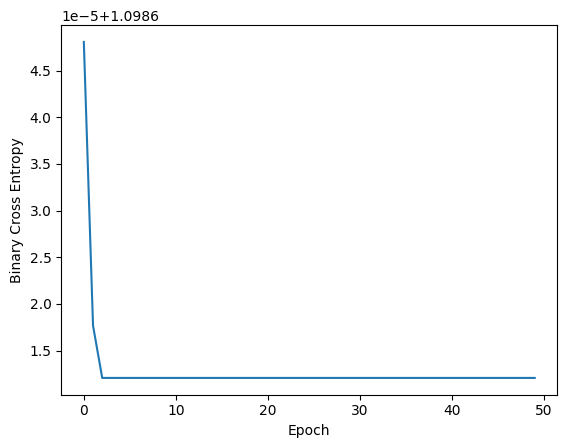

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(len(cost)), cost)
plt.ylabel('Binary Cross Entropy')
plt.xlabel('Epoch')
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score


In [ ]:
with torch.no_grad():
    train_pred = model(X_train)
    train_acc = (torch.argmax(train_pred, dim=1) == y_train).float().mean()
    
    print('Training Accuracy: %.2f' % train_acc)
    test_pred = model(X_test)
    test_acc = (torch.argmax(test_pred, dim=1) == y_test).float().mean()
    
    print('Testing Accuracy: %.2f' % test_acc)


Training Accuracy: 0.32
Testing Accuracy: 0.40


### Multinomial Logistic Regression

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms


Loading data.

In [ ]:
from matplotlib.transforms import Transform
transform = transforms.ToTensor()

train_data = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=False)

testdata = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testdata, batch_size=32, shuffle=False)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def im_show(img):
    img = img.numpy()
    img = np.transpose(img, (1, 2, 0))
    plt.imshow(img)
    plt.show()


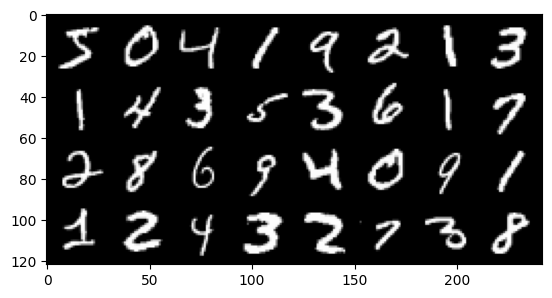

tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1,
        1, 2, 4, 3, 2, 7, 3, 8])


In [ ]:
data_iter = iter(train_loader)
images, labels = data_iter.next()
im_show(torchvision.utils.make_grid(images))
print(labels)


In [ ]:
images.view(images.size(0), -1).shape


torch.Size([32, 784])

In [ ]:
print(images[0].shape)


torch.Size([1, 28, 28])


In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class LogisticNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(1 * 28 * 28, 100)
        self.layer2 = nn.Linear(100, 30)
        self.layer3 = nn.Linear(30, 10)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = self.layer3(x)
        return x


model = LogisticNet()


In [ ]:
model


LogisticNet(
  (layer1): Linear(in_features=784, out_features=100, bias=True)
  (layer2): Linear(in_features=100, out_features=30, bias=True)
  (layer3): Linear(in_features=30, out_features=10, bias=True)
)

In [ ]:
import torch.optim as optim


In [ ]:
def train_mnst(model, train_loader, test_loader, EPOCHS=100, lr=.001, seed=32):
    torch.manual_seed(seed)
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    cost = []
    model.to(device)
    optimizer = optim.SGD(model.parameters(), lr=lr)
    loss_function = nn.CrossEntropyLoss()
    for epoch in range(EPOCHS):

        curr_loss = 0.0
        current = 0.0
        t_current = 0.0
        for i, data in enumerate(train_loader, 0):

            # Get a Batch of Data
            input, target = data[0].to(device), data[1].to(device)
            # 1. Compute the output

            # Flatten the input
            input = input.view(input.size(0), -1)
            y_hat = model(input)

            # 2. Compute the loss
            loss = loss_function(y_hat, target)

            # 3. Compute the gradient

            optimizer.zero_grad()
            loss.backward()

            # 4. Update the parameters

            optimizer.step()
            # Log the record
            with torch.no_grad():
                y_hat = model(input)
                err = loss_function(y_hat, target)
                curr_loss += err
                b_current = ((torch.argmax(y_hat, dim=1)
                             == target).sum()).float()

                current += b_current
        # Calculate the accuracy
        with torch.no_grad():
            for data in test_loader:
                ims, lbs = data[0].to(device), data[1].to(device)
                pred = model(ims.view(ims.size(0), -1))
                t_current += (torch.argmax(pred, dim=1) == lbs).sum()

            print('Current Epoch: %3d' % (epoch+1), end="")
            print(' | Loss: %5.2f' % curr_loss, end="")
            accuracy = current.sum()/len(train_data)*100
            test_accuracy = t_current.sum()/len(testdata)*100
            
            print(' | Accuracy: %.2f' % accuracy, end="")
            print(' | Test Accuracy: %.2f' % test_accuracy)
            
    return cost


In [ ]:
cost = train_mnst(model, train_loader, testloader, EPOCHS=30)


Current Epoch:   1 | Loss: 4288.17 | Accuracy: 13.47 | Test Accuracy: 23.63


KeyboardInterrupt: 

In [ ]:
len(train_data)


60000

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
prob = model(images.view(32, -1).to(device))
(torch.argmax(prob, dim=1).to('cpu') == labels).sum().float()/32*100


tensor(81.2500)